In [74]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
import datetime
import numpy as np

In [75]:
df = pd.read_csv('./smhi_temp_data_rensad.csv', sep=';')

In [76]:
df

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Unnamed: 4
0,1961-01-01,06:00:00,0.8,G,NaN
1,1961-01-01,12:00:00,1.0,G,NaN
2,1961-01-01,18:00:00,1.4,G,NaN
3,1961-01-02,06:00:00,1.8,G,NaN
4,1961-01-02,12:00:00,2.2,G,NaN
...,...,...,...,...,...
308145,2023-07-01,02:00:00,16.1,G,NaN
308146,2023-07-01,03:00:00,16.1,G,NaN
308147,2023-07-01,04:00:00,16.2,G,NaN
308148,2023-07-01,05:00:00,16.3,G,NaN


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308150 entries, 0 to 308149
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Datum           308150 non-null  object 
 1   Tid (UTC)       308150 non-null  object 
 2   Lufttemperatur  308150 non-null  float64
 3   Kvalitet        308150 non-null  object 
 4   Unnamed: 4      0 non-null       float64
dtypes: float64(2), object(3)
memory usage: 11.8+ MB


In [78]:
df = df.drop(columns='Unnamed: 4')

In [79]:
df.dtypes

Datum              object
Tid (UTC)          object
Lufttemperatur    float64
Kvalitet           object
dtype: object

In [80]:
df['Snittemperatur'] = df.groupby('Datum')['Lufttemperatur'].transform('mean').round(2)

In [81]:
df

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Snittemperatur
0,1961-01-01,06:00:00,0.8,G,1.07
1,1961-01-01,12:00:00,1.0,G,1.07
2,1961-01-01,18:00:00,1.4,G,1.07
3,1961-01-02,06:00:00,1.8,G,2.27
4,1961-01-02,12:00:00,2.2,G,2.27
...,...,...,...,...,...
308145,2023-07-01,02:00:00,16.1,G,16.06
308146,2023-07-01,03:00:00,16.1,G,16.06
308147,2023-07-01,04:00:00,16.2,G,16.06
308148,2023-07-01,05:00:00,16.3,G,16.06


In [82]:
df['Kvalitet'].value_counts()

Kvalitet
G    199142
Y    109008
Name: count, dtype: int64

In [83]:
df_avg_daily_temp = df.groupby('Datum').max().reset_index()

In [84]:
df_avg_daily_temp

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Snittemperatur
0,1961-01-01,18:00:00,1.4,G,1.07
1,1961-01-02,18:00:00,2.8,G,2.27
2,1961-01-03,18:00:00,2.8,G,2.27
3,1961-01-04,18:00:00,3.8,G,2.53
4,1961-01-05,18:00:00,2.6,G,2.13
...,...,...,...,...,...
19909,2023-06-27,23:00:00,21.0,G,18.18
19910,2023-06-28,23:00:00,24.2,G,19.72
19911,2023-06-29,23:00:00,22.0,G,19.22
19912,2023-06-30,23:00:00,19.4,G,17.40


In [85]:
df_max_daily_temp = df_avg_daily_temp.drop(['Tid (UTC)'], axis=1)

In [86]:
df_avg_daily_temp = df_avg_daily_temp.drop(['Tid (UTC)', 'Lufttemperatur'], axis=1)

In [87]:
df_avg_daily_temp['Snittemperatur'].min()

-22.22

In [88]:
df_avg_daily_temp['Snittemperatur'].max()

27.23

In [89]:
df_avg_daily_temp

,Datum,Kvalitet,Snittemperatur
0,1961-01-01,G,1.07
1,1961-01-02,G,2.27
2,1961-01-03,G,2.27
3,1961-01-04,G,2.53
4,1961-01-05,G,2.13
...,...,...,...
19909,2023-06-27,G,18.18
19910,2023-06-28,G,19.72
19911,2023-06-29,G,19.22
19912,2023-06-30,G,17.40


In [90]:
df_avg_daily_temp.to_csv('avg_daily_temp_curated.csv', index=False, mode='w')

In [91]:
df_avg_temp_per_month = df_avg_daily_temp

In [92]:
df_avg_temp_per_month['Datum'] = pd.to_datetime(df_avg_temp_per_month['Datum'])

In [93]:
df_avg_temp_per_month['Month'] = df_avg_temp_per_month['Datum'].dt.to_period('M')


In [94]:
df_avg_temp_per_month = df_avg_temp_per_month.groupby('Month').max().reset_index()

In [95]:
df_avg_daily_temp['Snittemperatur'].min()

-22.22

In [96]:
df_avg_temp_per_month = df_avg_temp_per_month.drop(['Datum'], axis=1)


In [97]:
df_avg_temp_per_month

,Month,Kvalitet,Snittemperatur
0,1961-01,G,4.87
1,1961-02,G,6.20
2,1961-03,G,8.87
3,1961-04,G,16.93
4,1961-05,G,17.40
...,...,...,...
655,2023-03,G,7.45
656,2023-04,G,13.72
657,2023-05,G,19.84
658,2023-06,G,22.48


In [98]:
df_avg_temp_per_month.to_csv('avg_monthly_temp_curated.csv', index=False, mode='w')

In [99]:
df_avg_temp_per_month.sort_values(by=['Snittemperatur'], ascending=False).head(20)

,Month,Kvalitet,Snittemperatur
173,1975-08,G,27.23
611,2019-07,G,26.89
148,1973-07,G,26.73
322,1994-07,Y,26.60
101,1969-08,G,26.57
599,2018-07,G,26.51
66,1966-07,G,26.33
635,2021-07,G,25.74
551,2014-07,G,25.70
323,1994-08,Y,25.63


In [100]:
varmaste_dagar = df.sort_values(by=['Lufttemperatur'], ascending=False)

In [101]:
varmaste_dagar

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Snittemperatur
265938,2018-07-31,12:00:00,33.3,G,26.51
274050,2019-07-26,14:00:00,33.2,G,26.89
274049,2019-07-26,13:00:00,33.1,G,26.89
68281,1994-07-26,13:00:00,33.1,Y,25.27
265939,2018-07-31,13:00:00,33.0,G,26.51
...,...,...,...,...,...
26076,1987-01-10,08:00:00,-22.8,Y,-22.22
26075,1987-01-10,07:00:00,-23.0,Y,-22.22
26074,1987-01-10,06:00:00,-23.0,G,-22.22
26072,1987-01-10,04:00:00,-23.3,Y,-22.22


In [102]:
varmaste_dagar['Year'] = varmaste_dagar['Datum'].str.split('-').str[0]

In [103]:
varmaste_dagar.dtypes

Datum              object
Tid (UTC)          object
Lufttemperatur    float64
Kvalitet           object
Snittemperatur    float64
Year               object
dtype: object

In [104]:
varmaste_dagar

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Snittemperatur,Year
265938,2018-07-31,12:00:00,33.3,G,26.51,2018
274050,2019-07-26,14:00:00,33.2,G,26.89,2019
274049,2019-07-26,13:00:00,33.1,G,26.89,2019
68281,1994-07-26,13:00:00,33.1,Y,25.27,1994
265939,2018-07-31,13:00:00,33.0,G,26.51,2018
...,...,...,...,...,...,...
26076,1987-01-10,08:00:00,-22.8,Y,-22.22,1987
26075,1987-01-10,07:00:00,-23.0,Y,-22.22,1987
26074,1987-01-10,06:00:00,-23.0,G,-22.22,1987
26072,1987-01-10,04:00:00,-23.3,Y,-22.22,1987


In [105]:
varmaste_hela_dagar = varmaste_dagar.groupby(varmaste_dagar['Datum']).max().drop(['Tid (UTC)'], axis=1).reset_index()

In [106]:
varmaste_hela_dagar.sort_values(by='Lufttemperatur', ascending=False).head(100)

,Datum,Lufttemperatur,Kvalitet,Snittemperatur,Year
18117,2018-07-31,33.3,G,26.51,2018
18477,2019-07-26,33.2,G,26.89,2019
9764,1994-07-26,33.1,Y,25.27,1994
19567,2022-07-20,32.9,G,25.35,2022
9752,1994-07-14,32.6,Y,26.60,1994
...,...,...,...,...,...
13770,2006-08-06,29.0,Y,22.26,2006
12301,2002-07-29,29.0,Y,23.39,2002
8673,1991-07-31,29.0,G,23.49,1991
13040,2004-08-06,29.0,Y,22.70,2004


In [108]:
varmaste_hela_dagar.to_csv('100_days_with_highest_temp.csv', index=False, mode='w')

In [162]:
# varmaste_dagar = varmaste_dagar.sort_values(by=['Year'])

In [61]:
top_20_varmaste = varmaste_dagar.sort_values(['Lufttemperatur'], ascending=False).head(20)

In [62]:
top_20_varmaste['Year'].dtype

dtype('O')

In [63]:
df_avg_temp_per_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   Month           660 non-null    period[M]
 1   Kvalitet        660 non-null    object   
 2   Snittemperatur  660 non-null    float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 15.6+ KB


<Axes: ylabel='Snittemperatur'>

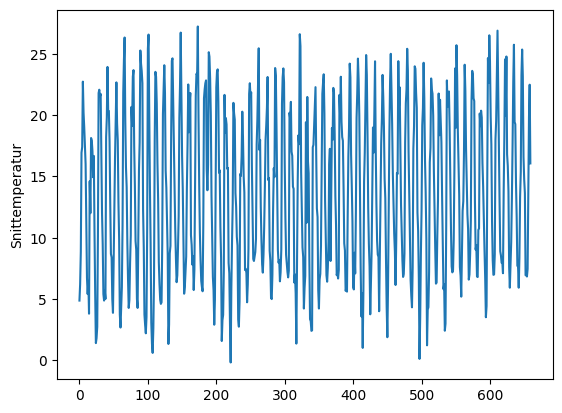

In [265]:
seaborn.lineplot(df_avg_temp_per_month['Snittemperatur'])

In [64]:
df_max_daily_temp_over_20 = df_max_daily_temp.where(df_max_daily_temp['Lufttemperatur'] >= 20).dropna()

In [68]:
df_max_daily_temp_over_20.sort_values(['Lufttemperatur'], ascending=False)

,Datum,Lufttemperatur,Kvalitet,Snittemperatur,Year
18117,2018-07-31,33.3,G,26.51,2018
18477,2019-07-26,33.2,G,26.89,2019
9764,1994-07-26,33.1,Y,25.27,1994
19567,2022-07-20,32.9,G,25.35,2022
9752,1994-07-14,32.6,Y,26.60,1994
...,...,...,...,...,...
5162,1975-05-06,20.0,G,15.40,1975
14113,2007-07-15,20.0,Y,17.32,2007
16337,2013-08-16,20.0,G,17.63,2013
18898,2020-09-19,20.0,G,15.22,2020


In [67]:
df_max_daily_temp_over_20['Year'] = df_max_daily_temp_over_20['Datum'].str.split('-').str[0]

In [269]:
df_max_daily_temp_over_20

,Datum,Lufttemperatur,Kvalitet,Snittemperatur,Year
112,1961-04-23,21.4,G,16.93,1961
113,1961-04-24,21.4,G,16.73,1961
116,1961-04-27,22.0,G,16.93,1961
149,1961-05-30,21.8,G,17.40,1961
150,1961-05-31,20.8,G,16.80,1961
...,...,...,...,...,...
19907,2023-06-25,23.2,G,19.41,2023
19908,2023-06-26,28.5,G,20.08,2023
19909,2023-06-27,21.0,G,18.18,2023
19910,2023-06-28,24.2,G,19.72,2023


In [270]:
# df_max_daily_temp_over_20['Year'] = pd.to_numeric(df_max_daily_temp_over_20['Year'])

<Axes: xlabel='Year', ylabel='Count'>

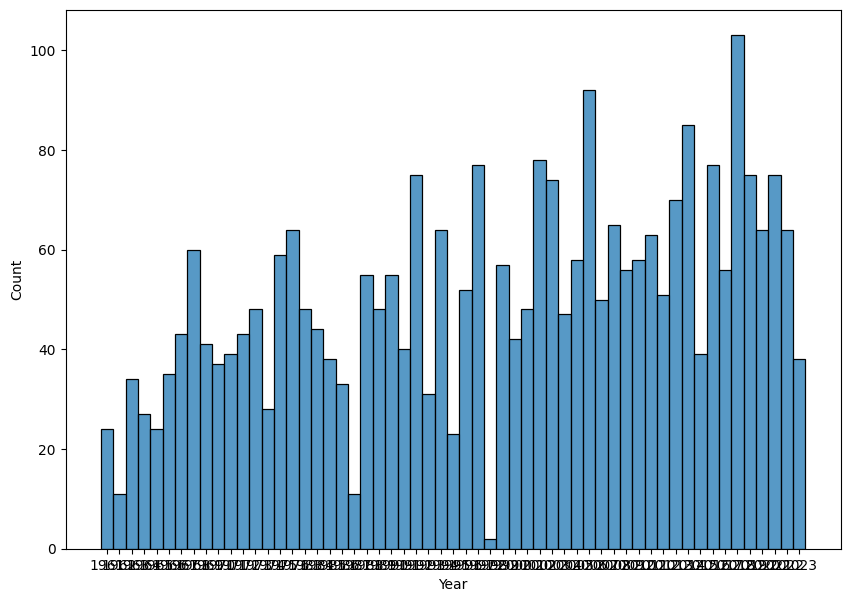

In [271]:
plt.figure(figsize=(10,7))
seaborn.histplot(df_max_daily_temp_over_20['Year'])

In [69]:
df_max_daily_temp['Year'] = df_max_daily_temp['Datum'].str.split('-').str[0]

In [70]:
df_max_daily_temp

,Datum,Lufttemperatur,Kvalitet,Snittemperatur,Year
0,1961-01-01,1.4,G,1.07,1961
1,1961-01-02,2.8,G,2.27,1961
2,1961-01-03,2.8,G,2.27,1961
3,1961-01-04,3.8,G,2.53,1961
4,1961-01-05,2.6,G,2.13,1961
...,...,...,...,...,...
19909,2023-06-27,21.0,G,18.18,2023
19910,2023-06-28,24.2,G,19.72,2023
19911,2023-06-29,22.0,G,19.22,2023
19912,2023-06-30,19.4,G,17.40,2023


In [71]:
df_max_daily_temp['Year'] = np.where(df_max_daily_temp['Lufttemperatur'] < 20, np.nan, df_max_daily_temp['Year'])

In [72]:
df_max_daily_temp

,Datum,Lufttemperatur,Kvalitet,Snittemperatur,Year
0,1961-01-01,1.4,G,1.07,NaN
1,1961-01-02,2.8,G,2.27,NaN
2,1961-01-03,2.8,G,2.27,NaN
3,1961-01-04,3.8,G,2.53,NaN
4,1961-01-05,2.6,G,2.13,NaN
...,...,...,...,...,...
19909,2023-06-27,21.0,G,18.18,2023
19910,2023-06-28,24.2,G,19.72,2023
19911,2023-06-29,22.0,G,19.22,2023
19912,2023-06-30,19.4,G,17.40,NaN


<Axes: xlabel='Year', ylabel='Count'>

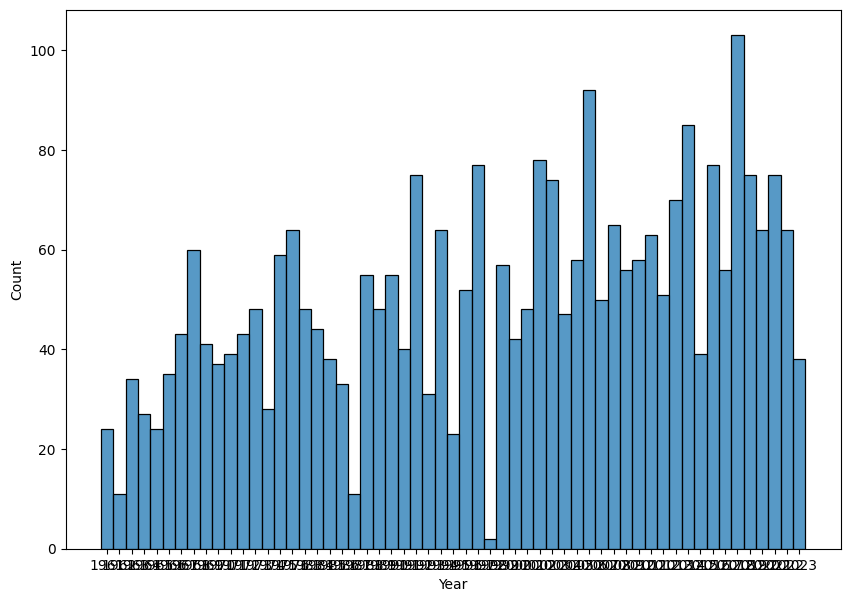

In [285]:
plt.figure(figsize=(10,7))
seaborn.histplot(df_max_daily_temp['Year'])

In [122]:
df['Year'] = df['Datum'].str.split('-').str[0]

In [124]:
df

,Datum,Tid (UTC),Lufttemperatur,Kvalitet,Snittemperatur,Year
0,1961-01-01,06:00:00,0.8,G,1.07,1961
1,1961-01-01,12:00:00,1.0,G,1.07,1961
2,1961-01-01,18:00:00,1.4,G,1.07,1961
3,1961-01-02,06:00:00,1.8,G,2.27,1961
4,1961-01-02,12:00:00,2.2,G,2.27,1961
...,...,...,...,...,...,...
308145,2023-07-01,02:00:00,16.1,G,16.06,2023
308146,2023-07-01,03:00:00,16.1,G,16.06,2023
308147,2023-07-01,04:00:00,16.2,G,16.06,2023
308148,2023-07-01,05:00:00,16.3,G,16.06,2023


<function matplotlib.pyplot.show(close=None, block=None)>

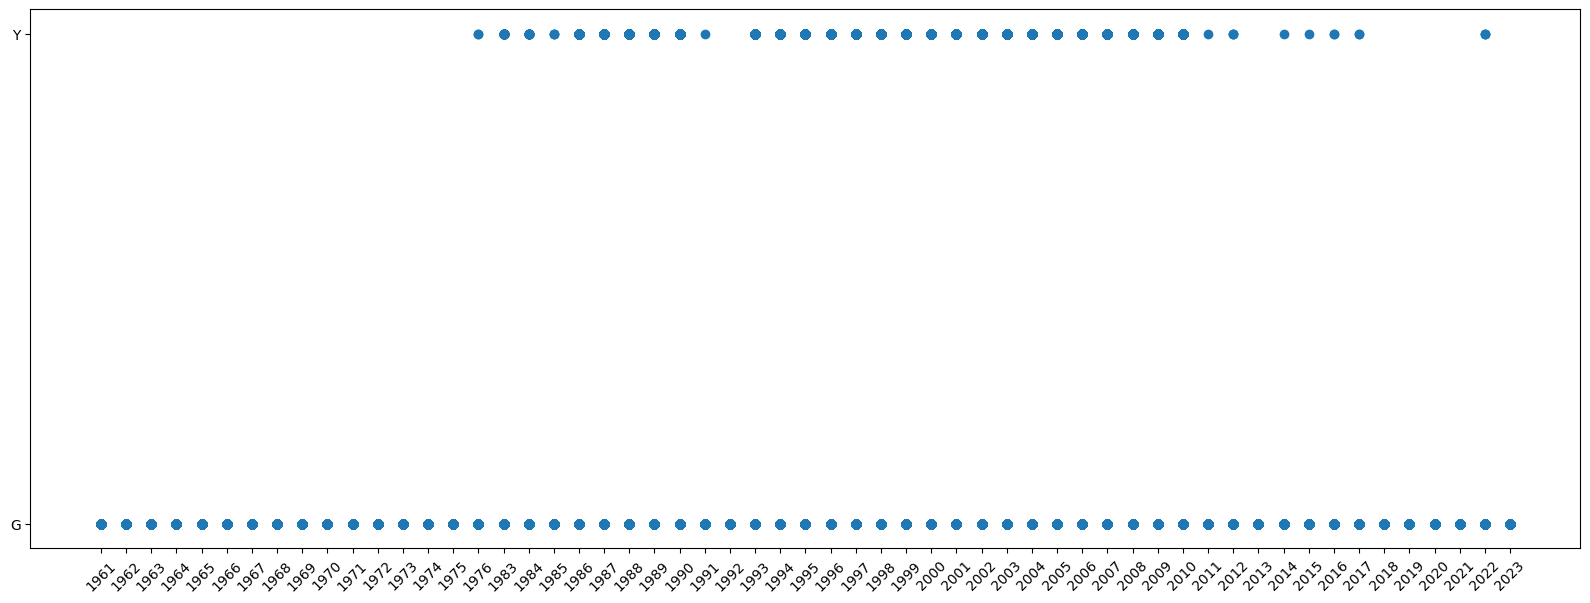

In [125]:
plt.figure(figsize=(20, 7))
plt.scatter(df['Year'], df['Kvalitet'])
plt.xticks(rotation=45)
plt.show